In [173]:
import param as pm
import panel as pn
import pandas as pd
import hvplot.pandas
pn.extension()
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [177]:

class LogisticsMap(pm.Parameterized):
    r = pm.Number(3.5, bounds=(-10,10), step=0.1)
    initial = pm.Number(0.4, bounds=(-100,100), step=0.1)
    steps = pm.Integer(10, bounds=(1,100))
    
    def update(self, a):
        return self.r * a * (1 - a)
    
    def series(self):
        series = []
        a = self.initial
        for i in range(self.steps):
            series.append(a)
            a = self.update(a)
        return series
    
    def view_series(self):
        series = self.series()
        df = pd.DataFrame(series)
        return df.hvplot()

In [178]:
lds = LogisticsMap()

In [179]:
pn.Row(lds, lds.view_series)


Row
    [0] Column(margin=5, name='LogisticsMap', width=300)
        [0] StaticText(value='<b>LogisticsMap</b>')
        [1] FloatSlider(end=10, name='R', start=-10, value=3.5)
        [2] FloatSlider(end=100, name='Initial', start=-100, value=0.4)
        [3] IntSlider(end=100, name='Steps', start=1, value=10)
    [1] ParamMethod(method)

In [181]:
class LogisticsMapPlot(pm.Parameterized):
    start_rate = pm.Number(2, bounds=(0,5), step=0.1)
    
    def update(self, r, a):
        return r * a * (1 - a)
    
    def series(self):
        series = []
        a = 0.4
        for r in range(self.start_rate*100, 400):
            for i in range(10000):
                if i > 9900:
                    series.append( {
                    'rate':r/100,
                    'population':a
                    })
                a = self.update(r/100, a)
        return series
    
    def view_series(self):
        figure(figsize=(18, 12), dpi=80)
        plt.style.use('seaborn-whitegrid')
        lm = LogisticsMap()
        df = pd.DataFrame(self.series())
        return plt.scatter(df.rate, df.population, s=0.5, color='black');

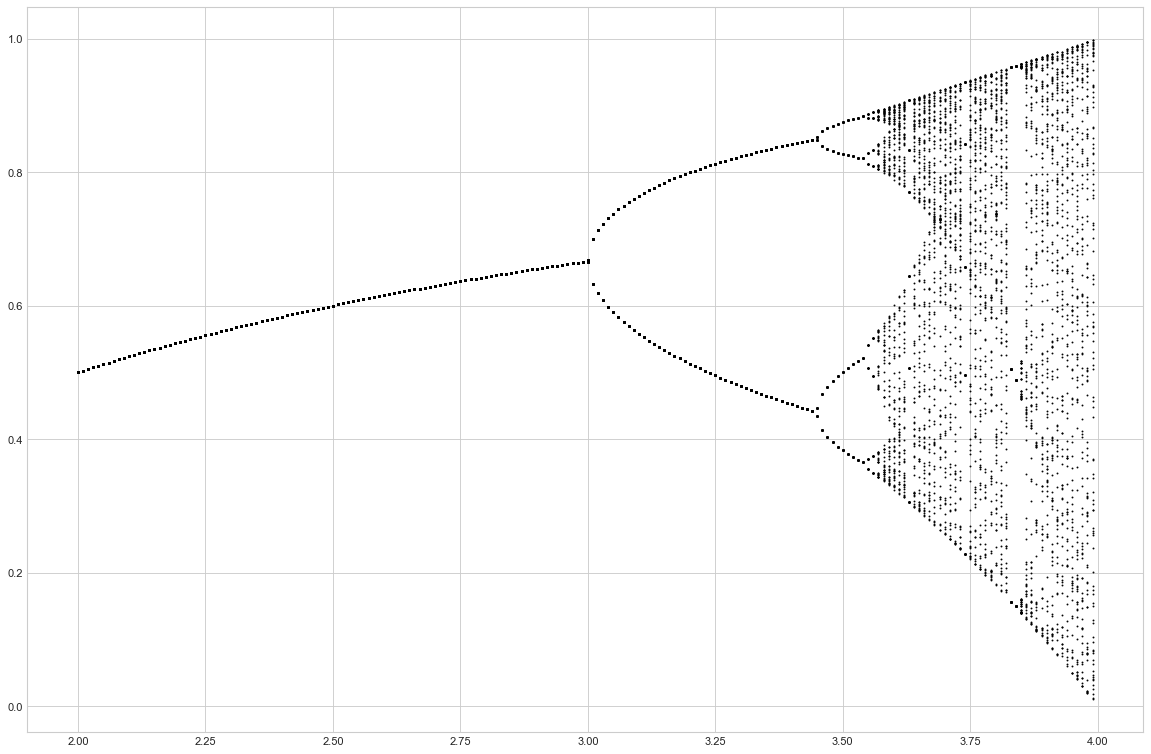

In [182]:
figure(figsize=(18, 12), dpi=80)
plt.style.use('seaborn-whitegrid')
lm = LogisticsMapPlot()
df = pd.DataFrame(lm.series())
plt.scatter(df.rate, df.population, s=0.5, color='black');